<p><span style="font-size:26pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Exercise 2</span></p>
<p><br></p>

<p><span style="font-size:13.999999999999998pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">In this exercise, we&rsquo;ll practice using standardization and robust scaling.</span></p>

<hr style="height:2px;border-width:0;color:black;background-color:black">

This data contains information on annual income and spending score for 200 regular customers at a mall who took a survey. Spending score represents how much they're likely to spend.

Run the code below to load this dataset and note that the clusters aren't well placed.

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


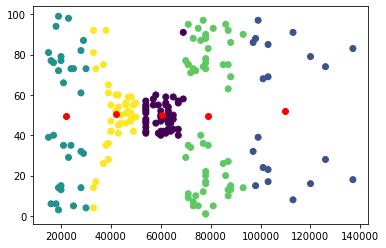

In [1]:
import pandas as pd
from urllib.request import urlretrieve

#Reads in the dataset from a URL
url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/78/mall_customer_dataset.csv"
urlretrieve(url, "mall_customer_dataset.csv")
mall_customers = pd.read_csv("mall_customer_dataset.csv",index_col=0)

#Plots the data points onto a scatterplot and colors them according to cluster
#The red dots represent the centroids of each cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
cluster = kmeans.fit_predict(mall_customers[["Annual Income ($)","Spending Score (1-100)"]])
import matplotlib.pyplot as plt
plt.scatter(mall_customers["Annual Income ($)"],mall_customers["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')

<hr style="height:2px;border-width:0;color:black;background-color:black">

Check to ensure that both features in the dataset are normally distributed.

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15000.,  27200.,  39400.,  51600.,  63800.,  76000.,  88200.,
        100400., 112600., 124800., 137000.]),
 <BarContainer object of 10 artists>)

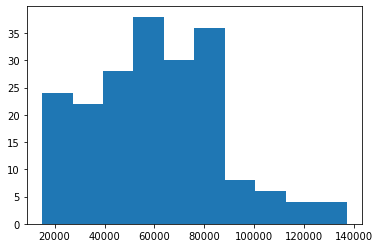

In [2]:
#Insert histogram for "Annual Income ($)" here:
#____________________________
plt.hist(mall_customers["Annual Income ($)"])
#____________________________

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

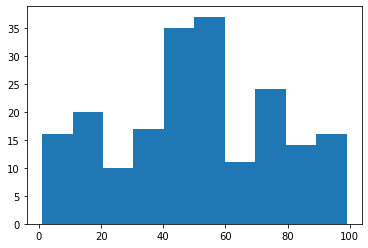

In [3]:
#Insert histogram for "Spending Score (1-100) here:
#____________________________
plt.hist(mall_customers["Spending Score (1-100)"])
#____________________________

<hr style="height:2px;border-width:0;color:black;background-color:black">

Scale the data with standardization.

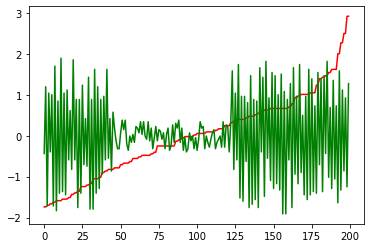

In [4]:
#Insert code between lines:
#____________________________
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().fit_transform(mall_customers)
mall_customers_std = pd.DataFrame(std_scaler, columns=mall_customers.columns)
#____________________________
x = range(len(mall_customers))
plt.plot(x,mall_customers_std["Annual Income ($)"],'red')
plt.plot(x,mall_customers_std["Spending Score (1-100)"],'green')

<hr style="height:2px;border-width:0;color:black;background-color:black">

Repurpose the k-means code below to run on the data scaled with standardization.

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


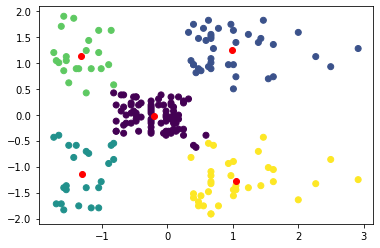

In [6]:
#We use the same k-means code as above
#This time we substitute mall_customers with mall_customers_std
#In the output, we can see that the clusters more closely fit the natural clusters in the data
K=5
kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(mall_customers_std[["Annual Income ($)","Spending Score (1-100)"]])
plt.scatter(mall_customers_std["Annual Income ($)"],mall_customers_std["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')

<hr style="height:2px;border-width:0;color:black;background-color:black">

Scale the data with robust scaling.

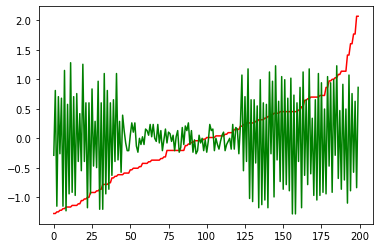

In [9]:
#Insert code between lines:
#____________________________
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler().fit_transform(mall_customers)
mall_customers_robust = pd.DataFrame(robust_scaler, columns=mall_customers.columns)
#____________________________
x = range(len(mall_customers))
plt.plot(x,mall_customers_robust["Annual Income ($)"],'red')
plt.plot(x,mall_customers_robust["Spending Score (1-100)"],'green')

<hr style="height:2px;border-width:0;color:black;background-color:black">

Repurpose the k-means code below to run on the data scaled with robust scaling.

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


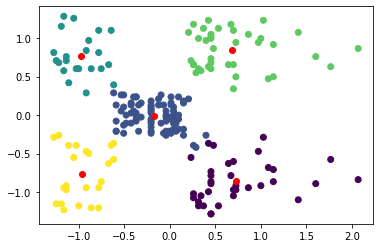

In [13]:
#We use the same k-means code as above
#This time we substitute mall_customers with mall_customers_robust
#In the output, we can see that the clusters more closely fit the natural clusters in the data
kmeans = KMeans(n_clusters=5)
cluster = kmeans.fit_predict(mall_customers_robust[["Annual Income ($)","Spending Score (1-100)"]])
plt.scatter(mall_customers_robust["Annual Income ($)"],mall_customers_robust["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')